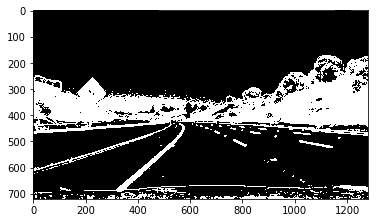

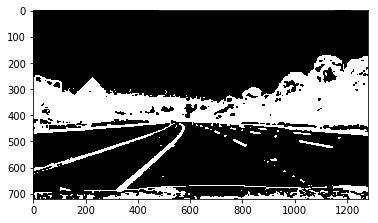

"\n# Run the function\ngradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 150))\n\ngrady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(80, 255))\n\ngradxy = abs_sobel_thresh(image, orient='xy', sobel_kernel=ksize, thresh=(1, 50))\n\n# Run the function\nmag_binary = mag_thresh(image, sobel_kernel=9, mag_thresh=(30, 100))\n\n# Run the function\ndir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))\n\n# Run the function\nhls_s_binary = hls_select(image, thresh=(150, 255), channel='S')\n\n# Run the function\nhls_h_binary = hls_select(image, thresh=(50, 200), channel='H')\n\n# Run the function\nhsv_v_binary = hsv_select(image, thresh=([0, 70, 70], [50, 255, 255]), channel='all', verbose='True')\n\ncombined = np.zeros_like(dir_binary)\n#combined[((gradx == 1) & (grady == 0)) | ((mag_binary == 1) | (dir_binary == 1)) | (hls_s_binary == 1)] = 1\n#combined[((gradx == 1) & (grady == 0)) | (hls_s_binary == 1)  | (hsv_v_binary == 1) & (h

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
from threshold_functions import abs_sobel_thresh
from threshold_functions import mag_thresh
from threshold_functions import dir_threshold
from threshold_functions import hls_select
from threshold_functions import hsv_select
from threshold_functions import binarize_image


# Read in an image
image = mpimg.imread('test_images/test2.jpg')
img_size = (image.shape[1], image.shape[0])

ksize = 9;

test, test1 = binarize_image(image, verbose='False')



'''
# Run the function
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 150))

grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(80, 255))

gradxy = abs_sobel_thresh(image, orient='xy', sobel_kernel=ksize, thresh=(1, 50))

# Run the function
mag_binary = mag_thresh(image, sobel_kernel=9, mag_thresh=(30, 100))

# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))

# Run the function
hls_s_binary = hls_select(image, thresh=(150, 255), channel='S')

# Run the function
hls_h_binary = hls_select(image, thresh=(50, 200), channel='H')

# Run the function
hsv_v_binary = hsv_select(image, thresh=([0, 70, 70], [50, 255, 255]), channel='all', verbose='True')

combined = np.zeros_like(dir_binary)
#combined[((gradx == 1) & (grady == 0)) | ((mag_binary == 1) | (dir_binary == 1)) | (hls_s_binary == 1)] = 1
#combined[((gradx == 1) & (grady == 0)) | (hls_s_binary == 1)  | (hsv_v_binary == 1) & (hls_h_binary == 0)] = 1
combined[((gradx == 1) & (grady == 0)) | (hsv_v_binary == 1)] = 1


color_binary = np.dstack(( np.zeros_like(gradx), gradx, grady)) * 255


# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(color_binary)
ax2.set_title('Stacks.', fontsize=50)
ax3.imshow(combined, cmap='gray')
ax3.set_title('Thresholded Grad. Combined.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

plt.figure()
plt.imshow(gradxy, cmap='gray')

plt.figure()
plt.imshow(grady, cmap='gray')

plt.figure()
plt.imshow(hsv_v_binary, cmap='gray')

plt.figure()
plt.imshow(hls_s_binary, cmap='gray')

plt.figure()
plt.imshow(hls_h_binary, cmap='gray') 
'''





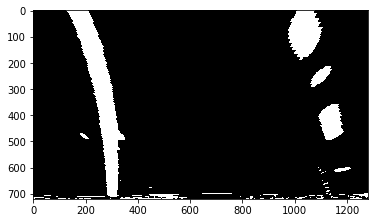

In [28]:
import cv2
from warp import warper

h, w = test1.shape[:2]
src = np.float32([[w, h-10],    # br
                      [0, h-10],    # bl
                      [546, 460],   # tl
                      [732, 460]])  # tr
dst = np.float32([[w, h],       # br
                      [0, h],       # bl
                      [0, 0],       # tl
                      [w, 0]])      # tr

M = cv2.getPerspectiveTransform(src, dst)
warped = cv2.warpPerspective(test1, M, img_size, flags=cv2.INTER_NEAREST)  # keep same size as input image

plt.figure()
plt.imshow(warped, cmap='gray')


In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import array
from os.path import join, basename
from threshold_functions import abs_sobel_thresh
from threshold_functions import mag_thresh
from threshold_functions import dir_threshold
from threshold_functions import hls_select
from threshold_functions import hsv_select

# Read in an image
image = warped
img_size = (image.shape[1], image.shape[0])

ksize = 5;

# Run the function
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 150))

grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(80, 255))

gradxy = abs_sobel_thresh(image, orient='xy', sobel_kernel=ksize, thresh=(20, 150))


# Run the function
mag_binary = mag_thresh(image, sobel_kernel=9, mag_thresh=(30, 100))

# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))

# Run the function
hls_s_binary = hls_select(image, thresh=(150, 255), channel='S')

# Run the function
hls_h_binary = hls_select(image, thresh=(50, 200), channel='H')

# Run the function
hsv_v_binary = hsv_select(image, thresh=([0, 70, 70], [50, 255, 255]), channel='all', verbose='True')

combined = np.zeros_like(dir_binary, dtype=np.uint8)
#combined[((gradx == 1) & (grady == 0)) | ((mag_binary == 1) | (dir_binary == 1)) | (hls_s_binary == 1)] = 1
#combined[((gradx == 1) & (grady == 0)) | (hls_s_binary == 1)  | (hsv_v_binary == 1) & (hls_h_binary == 0)] = 1
combined[((gradx == 1) & (grady == 0)) | (hsv_v_binary == 1)] = 1





color_binary = np.dstack(( np.zeros_like(gradx), gradx, grady)) * 255


# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(color_binary)
ax2.set_title('Stacks.', fontsize=50)
ax3.imshow(combined, cmap='gray')
ax3.set_title('Thresholded Grad. Combined.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

plt.figure()
plt.imshow(gradxy)

plt.figure()
plt.imshow(grady)

plt.figure()
plt.imshow(hsv_v_binary)

plt.figure()
plt.imshow(hls_s_binary)

plt.figure()
plt.imshow(hls_h_binary)

plt.figure()


fig = plt.imshow(combined, cmap='gray')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

image_out_dir = 'output_images'
out_path = join(image_out_dir, "test1_255.jpg")
final = mpimg.imsave(out_path, combined*255)

from PIL import Image
image_file = Image.open("output_images/test1.jpg") # open colour image
image_file = image_file.convert('1') # convert image to black and white
image_file.save('test1_BW.jpg')


error: OpenCV(3.4.5) c:\projects\opencv-python\opencv\modules\imgproc\src\color.hpp:255: error: (-2:Unspecified error) in function '__cdecl cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<1,-1,-1>,struct cv::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


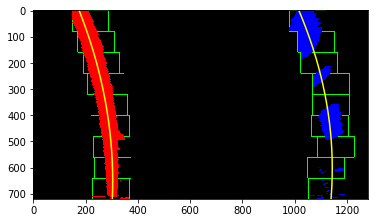

In [31]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

# Read in an image
#combined = mpimg.imread('output_images/test1_255.jpg')
img_size = (warped.shape[1], warped.shape[0])

#combined = cv2.cvtColor(combined,cv2.COLOR_BGR2GRAY)

# Load our image
binary_warped = warped


# Load our image
#binary_warped = mpimg.imread('warped-example.jpg')




def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 70
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low = leftx_current - margin # Update this
        win_xleft_high = leftx_current + margin  # Update this
        win_xright_low = rightx_current - margin # Update this
        win_xright_high = rightx_current + margin # Update this
        
        # Draw the windows on the visualization image
        out_img = cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        out_img = cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        
        ### TO-DO: Identify the nonzero pixels in x and y within the window ###
        good_left_inds = ((nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high) &
        (nonzeroy >= win_y_low) & (nonzeroy < win_y_high)).nonzero()[0]
        good_right_inds = ((nonzerox >= win_xright_low) & (nonzerox < win_xright_high) &
        (nonzeroy >= win_y_low) & (nonzeroy < win_y_high)).nonzero()[0]
      
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        ### TO-DO: If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    
     # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    ### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    left_fit_meter = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_meter = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    
    

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    return out_img, ploty, left_fitx, right_fitx, left_fit_meter, right_fit_meter
#plt.figure()

out_img, ploty, left_fit_cr, right_fit_cr, left_fit_cr_m, right_fit_cr_m = fit_polynomial(binary_warped)


plt.imshow(out_img)

In [47]:

def curve(A, B, y):
    return ((1+(2*A*y + B)**2)**(3/2))/(abs(2*A))


def measure_curvature_real():
    '''
    Calculates the curvature of polynomial functions in meters.
    '''
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    # Start by generating our fake example data
    # Make sure to feed in your real data instead in your project!
    #ploty, left_fit_cr, right_fit_cr = generate_data(ym_per_pix, xm_per_pix)
    
    
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval =  0
    
    ##### TO-DO: Implement the calculation of R_curve (radius of curvature) #####
    left_curverad = curve(left_fit_cr_m[0], left_fit_cr_m[1], y_eval*ym_per_pix)  ## Implement the calculation of the left line here
    right_curverad = curve(right_fit_cr_m[0], right_fit_cr_m[1], y_eval*ym_per_pix)  ## Implement the calculation of the right line here
    
    return left_curverad, right_curverad


# Calculate the radius of curvature in meters for both lane lines
left_curverad, right_curverad = measure_curvature_real()

print(left_curverad, 'm', right_curverad, 'm')
# Should see values of 533.75 and 648.16 here, if using
# the default `generate_data` function with given seed number

547.216139508 m 471.397369394 m
